# <center> **Ejemplo con variables categóricas**

Este dataset consta de 4521 registros de una institución bancaría en Portugal. Cada instancia representa un potencial cliente que fue contactado para ofrecerle una inversión a un plazo fijo. Los contactos fueron realizados por teléfono. Las variables son las siguientes (se indica cuáles variables son categóricas):


* Bank client data:
    1. **age**: Edad.
    2. **job**: Tipo de trabajo (categórica): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services". 
    3. **marital** : Estado civil (categórica): "married", "divorced", "single".
    4. **education**: Educación (categórica): "unknown", "secondary", "primary", "tertiary".
    5. **default**: Crédito en mora? (binary).
    6. **balance**: Saldo anual promedio, in euros. 
    7. **housing**: Tiene crédito hipotecario? (binary).
    8. **loan**: Tiene un crédito personal? (binary).

* Related with the last contact of the current campaign:
    9. **contact**: Tipo de comunicación (categórica): "unknown", "telephone", "cellular". 
    10. **day**: Día del mes del último contacto.
    11. **month**: Último mes de contacto (categórica): "jan", "feb", "mar", ...
    12. **duration**: Duración, en segundos, del último contacto.
* Other attributes:
    13. **campaign**: Número de contactos en esta campaña para este cliente.
    14. **pdays**: Número de días transcurridos desde el cliente fue contactado en una campaña diferente, -1 significa que el cliente no había sido contactado previamente.
    15. **previous**: Número de contactos anteriores con este cliente en esta campaña.
    16. **poutcome**: Resultado con este cliente en las campañas anteriores en que fue contactado (categórica): "unknown", "other", "failure", "success".

* Output variable (desired target):
    17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
bank_df = pd.read_csv('bank.csv',sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank_df.shape

(4521, 17)

**Distancia de Gower**

La distancia de Gower es una distancia que puede utilizarse para calcular la distancia entre dos entidades cuyos atributos son una mezcla de valores categóricos y continúos.

Para dos entidades $\mathbf{z}=(z_1,...,z_n)$, $\mathbf{w}=(w_1,...,w_n)$ cuyas $n$ features son una mezcla de features continúas y categóricas. Se calcula de la siguiente manera:

$$D(z,w)=\frac{1}{n} (\sum_{i\in \text{Continuas}} \frac{|z_i-w_i|}{max_i - min_i} + \sum_{i\in \text{Categoricas}}\text{Dice}(z_i,w_i) ),$$

donde $\text{Dice}(z_i,w_i)=0$ si $z_i=w_i$ y $\text{Dice}(z_i,w_i)=1$ si $z_i\neq w_i$. Es decir, está métrica de Dice cuenta en cuántos lugares son diferentes las variables categóricas.

Con esta distancia, calculamos una matriz de distancias en la cual la entrada $i,j$ corresponde a la distance entre las instacias $i$ y $j$. Esta distancia será introducida en el algoritmo de clusterización adecuado.


Veamos un ejemplo:



```r

     Age  Race  Height Income IsMale Politic
     (n)         (n)    (n)      
                  
[1]   22   1     3     0.39   TRUE   moderate
[2]   33   3     1     0.34   TRUE   liberal
[3]   52   1     2     0.51   FALSE  moderate
[4]   46   6     3     0.63   TRUE   conservative
                  
range 30   NA    2     0.29   NA     NA


Vamos a calcular la distancia entre las dos primeras observaciones: 

      Age Race  Ht  Inc   Male  Politic
      22,  1,  3,  0.39, True, moderate
      33,  3,  1,  0.34, True, liberal

numeric: abs(diff) / range 
non-numeric: 0 if equal, 1 if different

dist([1], [2]) =

Age:     abs((22 - 33) / 30)       = 0.367
Race:    (different)               = 1
Height:  abs((3 - 1) / 2)          = 1.000
Inc:     abs((0.39 - 0.34) / 0.29) = 0.172
IsMale:  (same)                    = 0 
Politic: (different)               = 1

 = (0.367 + 1 + 1.000 + 0.172 + 0 + 1) / 6 
 = 3.539 / 6
 = 0.590
 ```

<Figure size 1152x360 with 0 Axes>

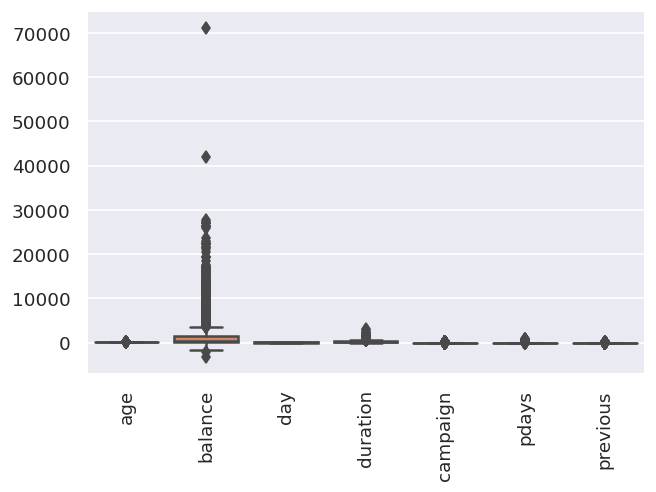

In [6]:
plt.figure(figsize=(16,5))
plt.figure(dpi=120)
sns.boxplot(data=bank_df)
plt.xticks(rotation=90)
plt.show()

Quitamos outliers, filtrando los datos que están a menos de 3 desviaciones standard de la media

In [7]:
import numpy as np
from scipy import stats

Shape before: (4521, 17)
Shape after: (4433, 17)


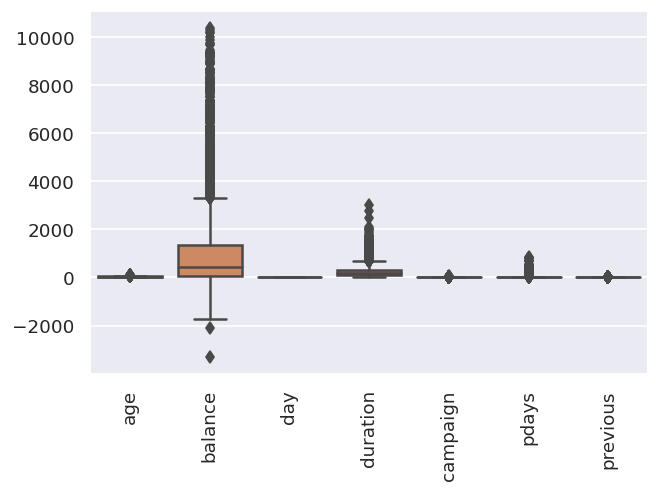

In [8]:
print(f"Shape before: {bank_df.shape}")
bank_df = bank_df[(np.abs(stats.zscore(bank_df['balance'])) < 3)].copy()

print(f"Shape after: {bank_df.shape}")

plt.figure(dpi=120)
sns.boxplot(data=bank_df)
plt.xticks(rotation=90)
plt.show()

Separamos el vector y_true de clases.

In [9]:
md = {'yes':0,'no':1}

y_true = bank_df['y'].map(md).values 

print(print(y_true.shape))

(4433,)
None


# Estandarización


                 
\begin{equation}
z_i    = \frac{x_i - \mu_i}{\sigma_i}
\end{equation}

In [10]:
bank_df['age'] = (bank_df['age'] - bank_df['age'].mean()) / bank_df['age'].std()
bank_df['balance'] = (bank_df['balance'] - bank_df['balance'].mean()) / bank_df['balance'].std()
bank_df['day'] = (bank_df['day'] - bank_df['day'].mean()) / bank_df['day'].std()
bank_df['duration'] = (bank_df['duration'] - bank_df['duration'].mean()) / bank_df['duration'].std()
bank_df['campaign'] = (bank_df['campaign'] - bank_df['campaign'].mean()) / bank_df['campaign'].std()
bank_df['pdays'] = (bank_df['pdays'] - bank_df['pdays'].mean()) / bank_df['pdays'].std()
bank_df['previous'] = (bank_df['previous'] - bank_df['previous'].mean()) / bank_df['previous'].std()

Shape before: (4433, 17)
Shape after: (4307, 17)


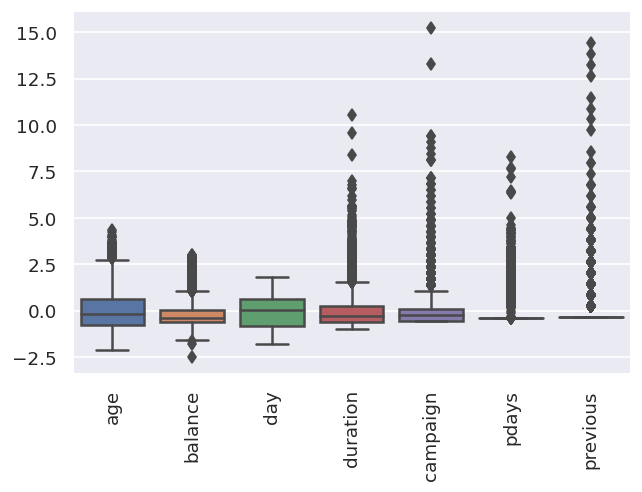

In [11]:
print(f"Shape before: {bank_df.shape}")
bank_df = bank_df[(np.abs(stats.zscore(bank_df['balance'])) < 3)].copy()

print(f"Shape after: {bank_df.shape}")

plt.figure(dpi=120)
sns.boxplot(data=bank_df)
plt.xticks(rotation=90)
plt.show()

In [12]:
bank_df = bank_df.drop('y', axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.053343,unemployed,married,primary,no,0.379759,no,no,cellular,0.372769,oct,-0.712420,-0.579022,-0.406210,-0.318836,unknown
1,-0.769180,services,married,secondary,no,2.078709,yes,yes,cellular,-0.596430,may,-0.172903,-0.579022,2.984109,2.039781,failure
2,-0.579737,management,single,tertiary,no,0.132444,yes,no,cellular,0.009319,apr,-0.306826,-0.579022,2.894365,0.270818,failure
3,-1.053343,management,married,tertiary,no,0.203752,yes,yes,unknown,-1.565630,jun,-0.253257,0.389097,-0.406210,-0.318836,unknown
4,1.693571,blue-collar,married,secondary,no,-0.631574,yes,no,unknown,-1.323330,may,-0.149945,-0.579022,-0.406210,-0.318836,unknown


Instalamos el módulo [gower](https://pypi.org/project/gower/):

In [13]:
!pip install -q gower

In [14]:
from gower import gower_matrix


distance_matrix = gower_matrix(bank_df)

¿Cómo se ve la matriz de distancias?

In [15]:
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4297,4298,4299,4300,4301,4302,4303,4304,4305,4306
0,0.000000,0.451005,0.417072,0.416641,0.382848,0.354858,0.372089,0.298661,0.344823,0.361115,...,0.368502,0.360236,0.231802,0.343745,0.364161,0.299574,0.517460,0.236151,0.310655,0.530082
1,0.451005,0.000000,0.355728,0.391848,0.351671,0.444911,0.295963,0.270340,0.394480,0.198723,...,0.353992,0.362392,0.400625,0.262160,0.334823,0.301731,0.426556,0.428662,0.368369,0.380569
2,0.417072,0.355728,0.000000,0.375329,0.455725,0.161683,0.267517,0.372945,0.359586,0.286943,...,0.441379,0.445613,0.429679,0.218932,0.317553,0.388628,0.529161,0.447934,0.422151,0.249622
3,0.416641,0.391848,0.375329,0.000000,0.294693,0.449885,0.383933,0.339108,0.234082,0.385460,...,0.319463,0.327863,0.428596,0.436235,0.401686,0.387100,0.260375,0.450662,0.471910,0.368543
4,0.382848,0.351671,0.455725,0.294693,0.000000,0.525081,0.322966,0.149238,0.166486,0.432679,...,0.059805,0.084788,0.221476,0.266905,0.295359,0.272854,0.282976,0.297208,0.316412,0.501911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,0.299574,0.301731,0.388628,0.387100,0.272854,0.426265,0.324279,0.191109,0.303701,0.308890,...,0.260282,0.215902,0.244134,0.243503,0.122619,0.000000,0.468706,0.247848,0.342152,0.490378
4303,0.517460,0.426556,0.529161,0.260375,0.282976,0.597193,0.335599,0.358850,0.238599,0.444181,...,0.322438,0.347420,0.484108,0.526518,0.503825,0.468706,0.000000,0.494320,0.588524,0.468710
4304,0.236151,0.428662,0.447934,0.450662,0.297208,0.375832,0.387705,0.181058,0.351522,0.426210,...,0.305326,0.313642,0.096164,0.300055,0.316561,0.247848,0.494320,0.000000,0.278728,0.539099
4305,0.310655,0.368369,0.422151,0.471910,0.316412,0.299665,0.298596,0.292175,0.436238,0.434297,...,0.337015,0.345415,0.196149,0.237190,0.356739,0.342152,0.588524,0.278728,0.000000,0.415706


# **Clustering**

# Aglomerativo

Usamos un Clustering Aglomerativo con la matriz de distancias, en lugar de la matriz de instancias $X$.

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [17]:
modelo = AgglomerativeClustering(n_clusters=3,linkage="complete",affinity="precomputed")
modelo.fit(distance_matrix)

clusters = modelo.labels_

sc = silhouette_score(distance_matrix, clusters, metric="precomputed")
print(f"Score de silueta: {round(sc,4)}")

Score de silueta: 0.1542000025510788


# DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

modelo = DBSCAN(eps=0.1, 
                    min_samples=5, 
                    metric="precomputed")

modelo.fit(distance_matrix)
clusters = modelo.labels_
print(np.unique(clusters))
#print(f"{len(np.unique(clusters))} clusters encontrados")

sc = silhouette_score(distance_matrix, clusters, metric="precomputed")
print(f"Score de silueta: {round(sc,4)}")

[-1  0]
Score de silueta: 0.1606999933719635


# Resultados

In [19]:
bank_df["cluster"] = clusters

bank_df.sample(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cluster
3389,0.462196,management,divorced,secondary,no,-0.427270,yes,no,unknown,0.372769,may,-0.685636,1.357215,-0.406210,-0.318836,unknown,0
3665,-1.432228,services,single,secondary,no,2.499768,yes,no,cellular,-1.081030,may,1.212239,-0.256316,2.425704,2.039781,failure,0
878,-0.958622,self-employed,single,secondary,no,-0.516689,no,yes,cellular,0.372769,nov,-0.337437,-0.579022,-0.406210,-0.318836,unknown,0
3469,0.651638,blue-collar,married,primary,no,-0.207120,yes,no,cellular,0.251619,may,-0.670330,1.034509,-0.406210,-0.318836,unknown,0
2565,-1.716391,blue-collar,single,unknown,no,-0.169202,yes,no,cellular,0.251619,may,-0.544060,-0.579022,-0.406210,-0.318836,unknown,0
1977,1.314686,management,divorced,tertiary,no,-0.977929,no,no,cellular,1.220819,aug,-0.513449,-0.256316,-0.406210,-0.318836,unknown,0
1209,1.598850,retired,single,secondary,no,0.296566,no,yes,cellular,-1.444480,feb,-0.739205,1.034509,2.335960,2.039781,failure,-1
2342,-0.200852,blue-collar,married,primary,no,-0.413688,yes,no,unknown,0.009319,may,-0.153772,0.389097,-0.406210,-0.318836,unknown,0
1579,-0.390295,management,married,tertiary,no,-0.326533,no,no,cellular,0.251619,jan,1.051532,-0.256316,0.750487,1.450127,failure,0
2772,0.651638,management,single,tertiary,no,-0.397276,no,no,cellular,0.615069,jul,1.897157,-0.256316,-0.406210,-0.318836,unknown,0


In [20]:

bank_df[bank_df['cluster']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cluster
1,-0.769180,services,married,secondary,no,2.078709,yes,yes,cellular,-0.596430,may,-0.172903,-0.579022,2.984109,2.039781,failure,0
2,-0.579737,management,single,tertiary,no,0.132444,yes,no,cellular,0.009319,apr,-0.306826,-0.579022,2.894365,0.270818,failure,0
3,-1.053343,management,married,tertiary,no,0.203752,yes,yes,unknown,-1.565630,jun,-0.253257,0.389097,-0.406210,-0.318836,unknown,0
4,1.693571,blue-collar,married,secondary,no,-0.631574,yes,no,unknown,-1.323330,may,-0.149945,-0.579022,-0.406210,-0.318836,unknown,0
5,-0.579737,management,single,tertiary,no,-0.208818,no,no,cellular,0.857369,feb,-0.475186,-0.256316,1.358750,1.450127,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,-0.295574,blue-collar,married,secondary,no,0.050382,yes,no,cellular,0.493919,apr,-0.842516,0.389097,1.129405,0.270818,failure,0
4515,-0.863901,services,single,secondary,no,-0.363885,yes,no,cellular,-1.081030,jul,1.372946,0.711803,-0.406210,-0.318836,unknown,0
4516,-0.769180,services,married,secondary,no,-0.820032,yes,no,cellular,1.705418,jul,0.244170,0.711803,-0.406210,-0.318836,unknown,0
4518,1.504129,technician,married,secondary,no,-0.464622,no,no,cellular,0.372769,aug,-0.436922,2.648040,-0.406210,-0.318836,unknown,0


Veamos se podemos encontrar mejores valores para el coeficiente de silueta.

# Aglomerativo


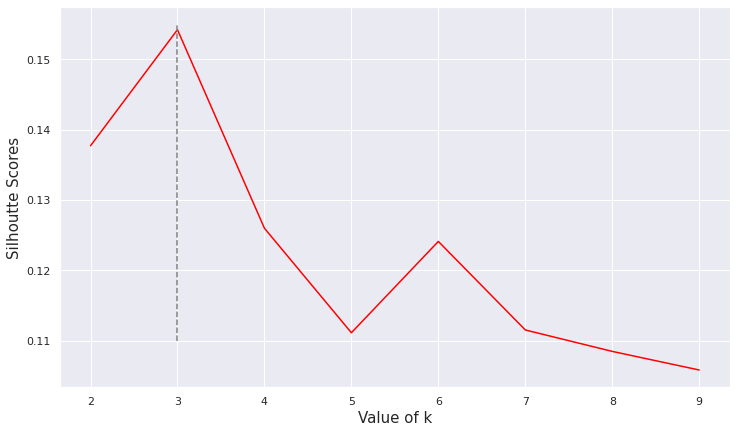

In [ ]:
max_num_clusters = 10

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k,linkage="complete",affinity="precomputed")
    ac.fit(distance_matrix)
    clusters = ac.labels_
    siluetas.append(silhouette_score(distance_matrix, clusters, metric="precomputed"))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[0.11,0.155],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

In [ ]:
modelo = AgglomerativeClustering(n_clusters=3,linkage="complete",affinity="precomputed")
modelo.fit(distance_matrix)

clusters = modelo.labels_

sc = silhouette_score(distance_matrix, clusters, metric="precomputed")
print(f"Score de silueta: {round(sc,4)}")

Score de silueta: 0.1542000025510788


In [ ]:
bank_df["cluster"] = clusters

bank_df.sample(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cluster
658,0.556917,technician,married,secondary,no,-0.599316,no,no,cellular,-1.323330,may,-0.046634,-0.579022,3.014024,0.270818,success,2
3904,-0.863901,admin.,married,secondary,no,-0.588563,yes,no,unknown,0.615069,may,-0.291521,-0.256316,-0.406210,-0.318836,unknown,1
2024,0.083311,self-employed,divorced,tertiary,no,-0.509332,yes,no,cellular,-0.959880,may,-0.463707,0.066390,-0.406210,-0.318836,unknown,0
1317,-1.337507,self-employed,single,secondary,no,-0.603843,yes,no,cellular,1.705418,jan,-0.218820,-0.256316,-0.406210,-0.318836,unknown,0
1715,-0.295574,admin.,married,secondary,no,1.480511,yes,no,unknown,0.615069,may,0.435488,-0.256316,-0.406210,-0.318836,unknown,1
3307,-1.242785,student,single,secondary,no,-0.631574,yes,no,unknown,-0.111831,may,-0.505797,0.066390,-0.406210,-0.318836,unknown,1
3502,-0.863901,management,divorced,tertiary,no,-0.131850,yes,no,cellular,-0.717580,dec,2.038732,-0.579022,1.448494,2.629436,other,2
425,-1.148064,blue-collar,single,primary,no,-0.093932,yes,no,unknown,-1.444480,jun,-0.498144,0.066390,-0.406210,-0.318836,unknown,1
4466,1.883013,management,married,secondary,no,-0.084311,no,no,cellular,0.493919,aug,-0.325958,-0.579022,-0.406210,-0.318836,unknown,0
1892,-1.337507,services,married,secondary,no,-0.574981,no,no,cellular,0.009319,jul,-0.796600,-0.256316,-0.406210,-0.318836,unknown,0
